In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing the libraries
import scipy.io 
import numpy as np
from scipy import signal

#loading the sparse encodings and the training dictionary
sparse_encodings = np.load('/content/drive/MyDrive/Impulse_19/Task#5/sparse_representations.npy')
mat = scipy.io.loadmat('/content/drive/MyDrive/Impulse_19/Task#6/Dictonary.mat')

Dh = mat['Dh']

#normalizing the training dictionary to reduce some redundancies that could be existing in the given dataset
norm_dh = np.sqrt(np.sum(Dh**2, 1))
Dhn = np.divide(Dh, np.transpose(np.tile(norm_dh, (np.size(Dh, 1), 1))))
sparse_encodings.shape

(51, 51, 512)

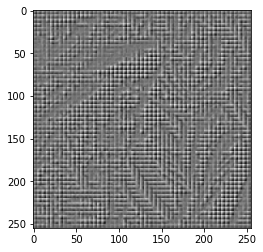

In [ ]:
super_resoluted_img = np.zeros((255, 255))

for i in range(sparse_encodings.shape[0]):
  for j in range(sparse_encodings.shape[0]):
    x = np.matmul(Dhn, sparse_encodings[i, j])             # performing matrix multiplication on the normalized dict and the previously obtained
    x = x.reshape((5, 5))                                  # sparse representation of the filtered and upscaled image to obtain a super 
    super_resoluted_img[5*i: 5*i+5, 5*j: 5*j+5] = x        # resoluted image as our final output for the given problem.

import matplotlib.pyplot as plt

plt.imshow(super_resoluted_img, cmap = 'gray')
plt.show()

In [ ]:
import cv2

cv2.imwrite('/content/drive/MyDrive/Impulse_19/Task#6/superResolutedImg.jpg', super_resoluted_img)

True